In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

import torch

import gym

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from baseline_policies.threshold import Threshold

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching

import random

from human_agents import generate_agents

In [ ]:
%config InlineBackend.figure_format = "retina"
sns.set()

In [4]:
def run_one_episode(env, policy):
    rewards = []
    actions = []

    obs = env.reset()
    while True:
        action = policy.act(obs)
        obs, reward, done, info = env.step(action)

        rewards.append(reward)
        actions.append(action)

        if done:
            obs = env.reset()
            break
            
    return rewards, actions

# Without breaks

In [26]:
n_users = 100
n_items = 30
random.seed(123)
user = random.randint(0, n_users)
forget_rates, repetition_rates = generate_agents(n_users, n_items)

In [27]:
print("forget", forget_rates[user].mean())
print("repeat", repetition_rates[user].mean())

forget 0.018778361369110604
repeat 0.027150216388525286


In [41]:
interval = 100

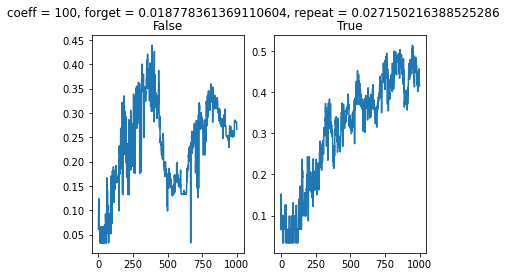

In [42]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('coeff = {}, forget = {}, repeat = {}'.
             format(interval, forget_rates[user].mean(), repetition_rates[user].mean()))

for i, multiply_delta in enumerate([False, True]):
    env = ContinuousTeaching(
        t_max=100,
        initial_forget_rates=forget_rates[user],
        initial_repetition_rates=repetition_rates[user],
        n_item=n_items,
        interval=interval,
        multiply_delta=multiply_delta,
        tau=0.9)
    
    model = A2C(env, seed=123)

    iterations = env.t_max * 1000
    check_freq = env.t_max

    with ProgressBarCallback(env, check_freq) as callback:
        model.learn(iterations, callback=callback)
        axs[i].plot([np.mean(r) for r in callback.hist_rewards])
        axs[i].set_title('{}'.format(multiply_delta))

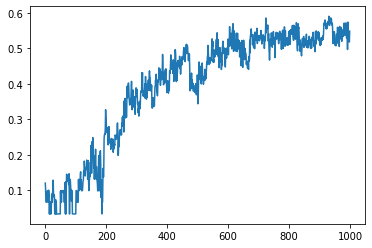

In [33]:
plt.plot([np.mean(r) for r in callback.hist_rewards])